In [1]:
from models.TFT.tft_model import TFTModel
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss

import os
import pandas as pd

ROOT_PATH = os.path.pardir

In [2]:
from datasets.loader import load_dataset, Dataset
loaded = load_dataset(pd.read_csv("datasets/MackeyGlass.csv"), 100, 30, target_column="Total")

Target column: 'Total'


# TFT Model
## 100/30 Model definition
We define a model that will predict 30 steps ahead based on 100 steps behind.

In [3]:
TFT_100_30 = TFTModel(
    dataset=pd.read_csv("datasets/MackeyGlass.csv"),
    n_steps_in=100,
    n_steps_out=30,
    test_frac=0.1,
    metric= QuantileLoss(),
    target_column="Total")

Target column: 'Total'


## Fit model to data

In [4]:
best_params = {'gradient_clip_val': 0.05096799805327498, 'hidden_size': 93, 'dropout': 0.058749556923019634, 'hidden_continuous_size': 20, 'attention_head_size': 5, 'learning_rate': 0.0020755186706848555}

In [5]:
#best_params = TFT_100_30.optuna_fit(60, 30, "best_optuna")

In [6]:
#Change max_epochs to higher number such as ~50
TFT_100_30.fit(training_params = best_params, max_epochs = 10, limit_train_batches=1000)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
2023-06-08 15:27:13.972990: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 15:27:14.839763: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


## Get forecasts
### with autoregression as well!

## Plot forecasts

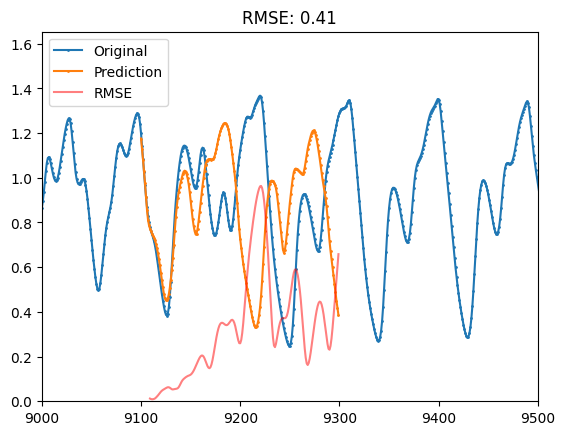

In [8]:
# Autoregressive forecast
forecast_autoregressive = TFT_100_30.predict(200, autoreggressive=True, shift = 0)
TFT_100_30.plotter.plot_forecast(forecast_autoregressive, xlim=(9000, 9500), linestyle='-')

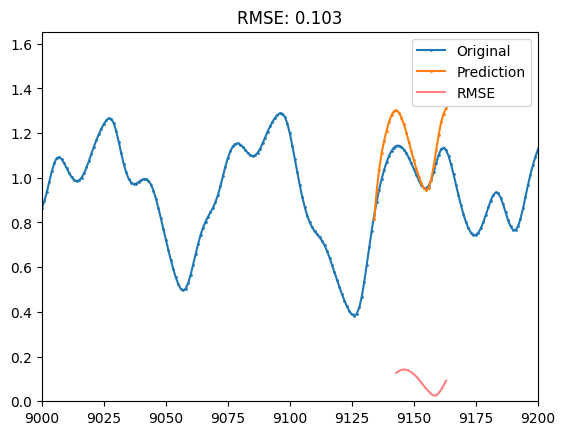

In [9]:
# Windowed forecast
forecast = TFT_100_30.predict(30, autoreggressive=False, shift=34)
TFT_100_30.plotter.plot_forecast(forecast, xlim=(9000, 9200), linestyle='-')